# MNIST Handwritten Digit Classification - Neural Network

## Importing the dependencies

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Loading the MNIST data from keras.datasets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
type(X_train)

numpy.ndarray

In [8]:
type(y_train)

numpy.ndarray

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
X_train[0].shape

(28, 28)

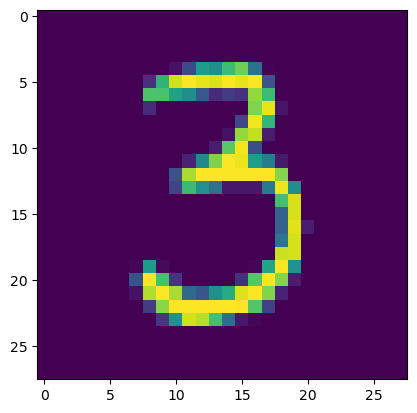

In [17]:
plt.imshow(X_train[50])
plt.show()

In [16]:
y_train[50]

3

In [19]:
# unique values y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [20]:
# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use the labels as such OR we can also apply one-hot encoding

In [22]:
# scaling the values of training and test sets

X_train = X_train / 255
X_test = X_test / 255

## Building a Neural Network

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8796 - accuracy: 0.7330
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4026 - accuracy: 0.8834
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3442 - accuracy: 0.9004
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.9094
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.9170
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2627 - accuracy: 0.9237
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2398 - accuracy: 0.9299
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2189 - accuracy: 0.9364
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2000 - accuracy: 0.9409
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.183

## Model Evaluation

### Accuracy on test data

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.9694
0.9693999886512756
0.10630299150943756


The model performs reasonably well on unseen data. There seems to be no overfitting

In [33]:
y_pred_probability = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [36]:
y_pred = np.argmax(y_pred_probability, axis=1)

In [37]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
y_pred.shape

(10000,)

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)

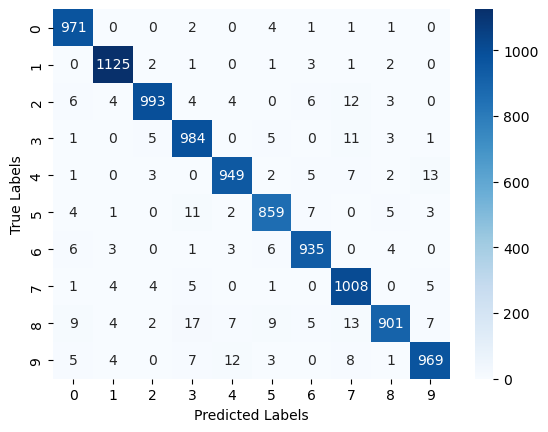

In [44]:
sns.heatmap(conf_mat, cbar=True, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()